In [145]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans

#added
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import ipywidgets as widgets

In [146]:
# Load the Spotify dataset
# Ensure the .csv file is in the correct directory or provide a full path to the file
tracks_df = pd.read_csv("Spotify_tracks.csv")


In [147]:
tracks_df.head()


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [148]:
tracks_df.describe()


,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [149]:
tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

## Data Exploration

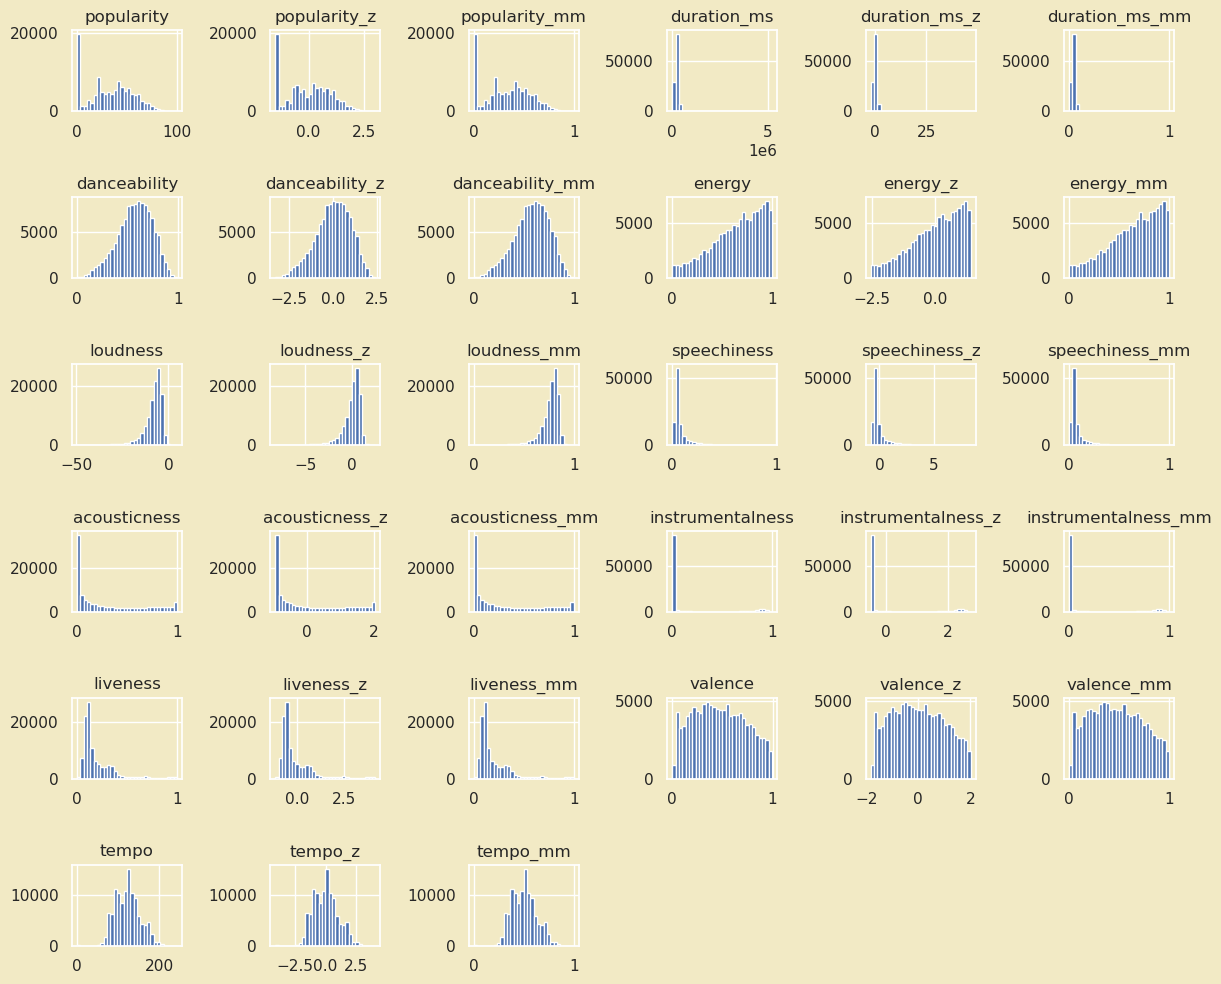

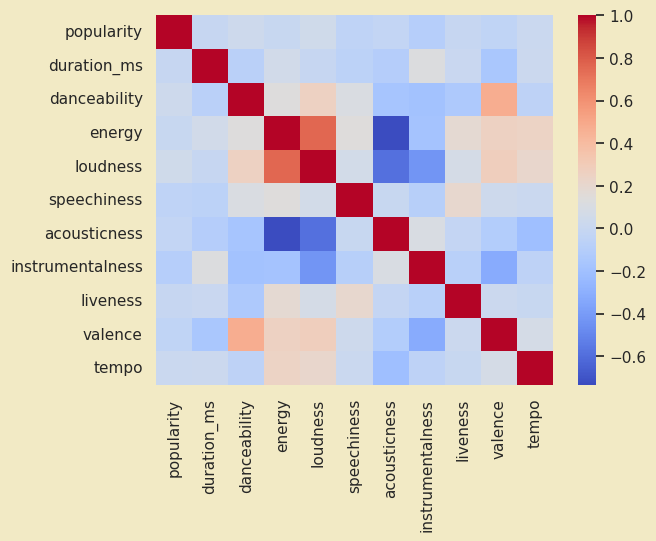

In [151]:
# PLOTTING HISTOGRAMS FOR ALL VARIABLES and it's zscore, mini-max values

data = tracks_df[['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
scaler = MinMaxScaler()
data_mm = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
data_z = data.apply(zscore)

fig = plt.figure(figsize=(12,10))

for i, col in enumerate(data.columns):
    ax = fig.add_subplot(6,6,i * 3 + 1)
    ax.hist(data[col], bins=30)
    ax.set_title(col)
    ax = fig.add_subplot(6,6,i * 3 + 2)
    ax.hist(data_z[col], bins=30)
    ax.set_title(col + "_z")
    ax = fig.add_subplot(6,6,i * 3 + 3)
    ax.hist(data_mm[col], bins=30)
    ax.set_title(col + "_mm")

    
fig.tight_layout()
plt.show()


# CALCULATE THE CORRELATION MATRIX
correlation = data.corr()


# PLOT THE HEATMAP

heatmap = sns.heatmap(correlation, cmap="coolwarm")
plt.show()




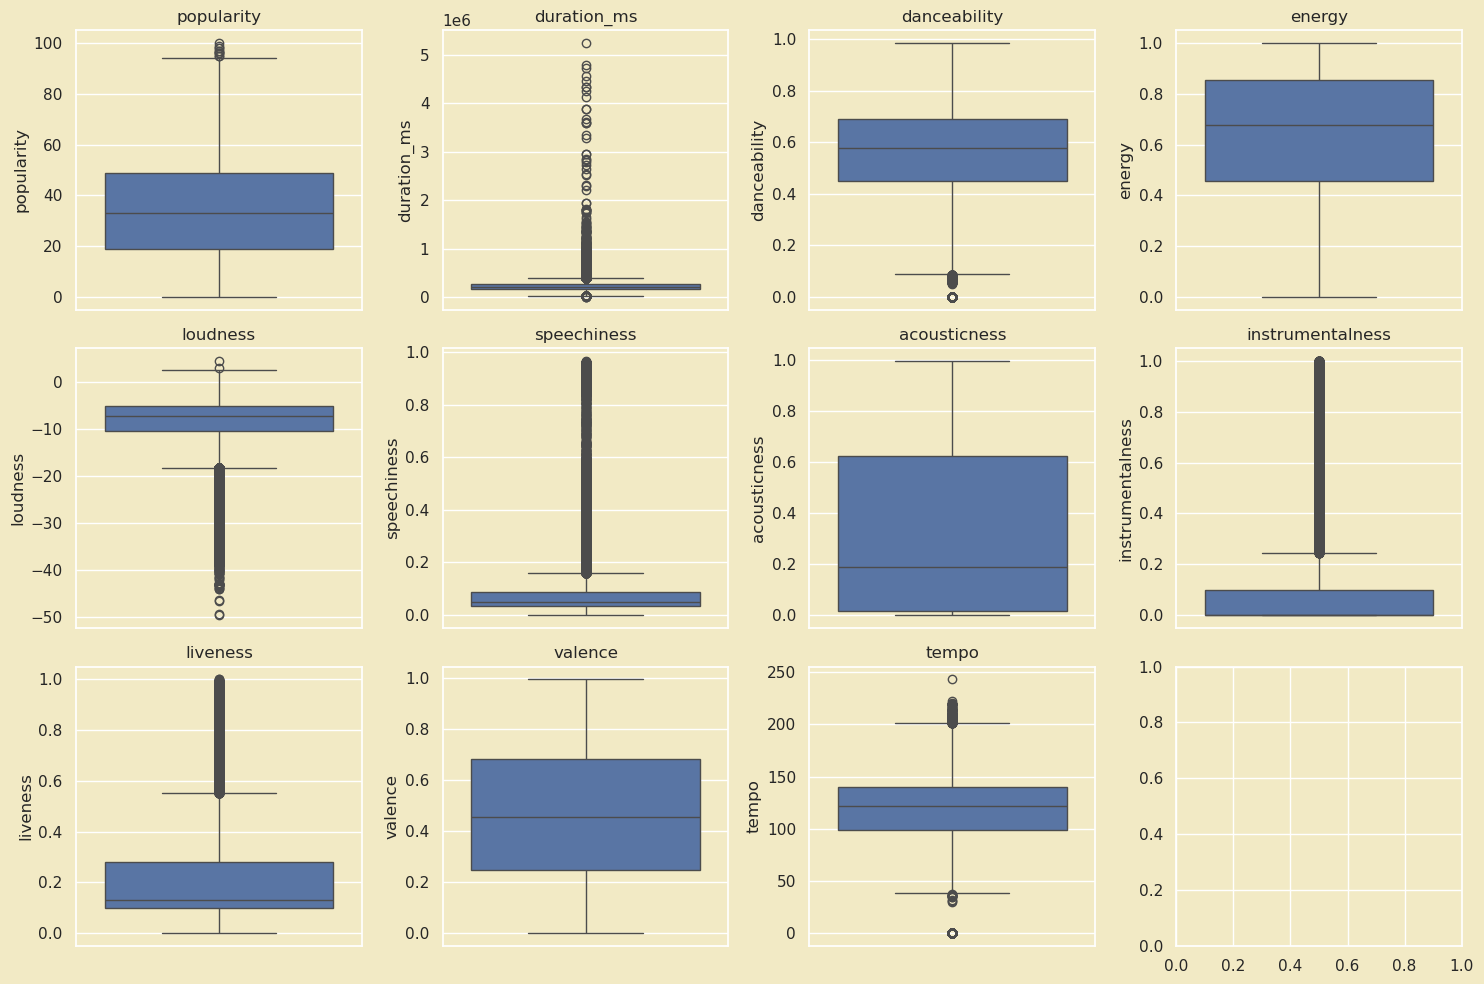

In [41]:
# boxplot for numerical columns
sns.set_style('darkgrid')
sns.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#F2EAC5"})
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
for i, col in enumerate(data.columns):
    sns.boxplot(y=col, data=data, ax=axes[i//4, i%4])
    axes[i//4, i%4].set_title(col)
plt.tight_layout()
plt.show()

In [191]:
# use zscore to remove outliers
def my_zscore_drop(data, cols):
    for col in cols:
        rows = data.shape[0]
        data_copy = data.copy()
        data_zscore = zscore(data[col])
        data = data_copy[abs(data_zscore) <= 3]
        print("zscore drop ", col, ":", rows - data.shape[0])
    return data

In [192]:
# use IQR to identify outliers
def my_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

def my_iqr_drop(data, cols):
    for col in cols:
        rows = data.shape[0]
        data_copy = data.copy()
        lower_bound, upper_bound = my_iqr(data_copy[col])
        data = data_copy[(data_copy[col] <= upper_bound) & (data_copy[col] >= lower_bound)]
        print("after IQR drop ", col, ":",  rows - data.shape[0])
    return data

In [193]:
# one hot encode 'track_genre'
def my_genre_encode(data):
    data_copy = data.copy()
    data_copy['track_genre'] = tracks_df['track_genre']
    data = pd.get_dummies(data_copy, columns = ['track_genre'])
    print("shape after encode track_genre: ", data.shape)
    return data

In [194]:
# see if pca helps
def my_pca(data, size):
    pca = PCA(n_components = size)
    data_pca = pca.fit_transform(data)
    data = pd.DataFrame(data_pca)
    print("shape after pca: ", data.shape)
    return data

original data shape: (114000, 21)
after drop rows with missing value: 1
after drop duplicate rows: 24259
zscore drop  tempo : 186
zscore drop  loudness : 1952
zscore drop  acousticness : 0
zscore drop  instrumentalness : 0
zscore drop  danceability : 4
zscore drop  liveness : 2751
zscore drop  speechiness : 1654
zscore drop  valence : 0
after IQR drop  tempo : 313
after IQR drop  loudness : 3297
after IQR drop  acousticness : 0
after IQR drop  instrumentalness : 17620
after IQR drop  danceability : 131
after IQR drop  liveness : 3155
after IQR drop  speechiness : 6566
after IQR drop  valence : 0
data shape: (52111, 8)
shape after encode track_genre:  (52111, 121)
2 0.5405880132487815
3 0.5347529549259117
4 0.4798999255397054
5 0.4817519740583961
6 0.44884181128923145
7 0.43220963152974207
8 0.40725277625905987
9 0.3891829028183851
10 0.37603076309420785
11 0.37245277614257216


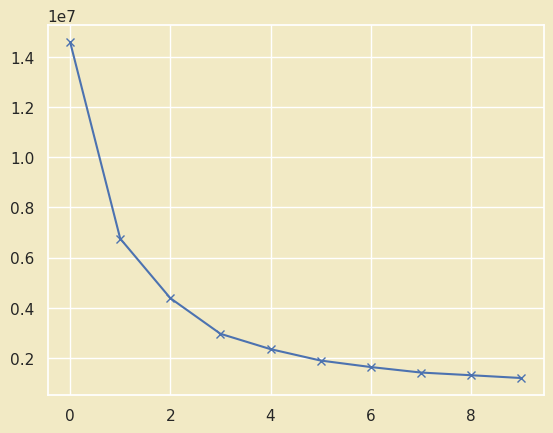

In [196]:
# put everything together to play around easier
tracks_df = pd.read_csv("Spotify_tracks.csv")
print("original data shape:", tracks_df.shape)
rows = tracks_df.shape[0]

tracks_df = tracks_df.dropna()
print("after drop rows with missing value:",rows - tracks_df.shape[0])
rows = tracks_df.shape[0]

# test result: will not affect clustering, but will make compute faster
tracks_df = tracks_df.drop_duplicates(subset=['track_id'])
print("after drop duplicate rows:", rows - tracks_df.shape[0])
rows = tracks_df.shape[0]


# these columns looks more relavent, added 'tempo', removed 'energy'
cols = [ 'tempo', 'loudness', 'acousticness',"instrumentalness",'danceability', 'liveness', 'speechiness', 'valence']
#cols = [ 'tempo', 'loudness', 'acousticness',"instrumentalness",'danceability', 'liveness', 'speechiness', 'valence', 'energy']

tracks_df = my_zscore_drop(tracks_df, cols)
tracks_df = my_iqr_drop(tracks_df, cols)
data = tracks_df[cols]

# mini max scaler and zscaler is making the silhouette_score really bad
# data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
# data = data.apply(zscore)


print("data shape:", data.shape)

data = my_genre_encode(data)
#data = my_pca(data, 6)

# try silhouette analyze, super slow
print("silhouette:")
for i in range(2, 12):
    temp = KMeans(n_clusters = i)
    temp = temp.fit_predict(data)
    # smaller sample size help get result quicker
    print(i, silhouette_score(data, temp, sample_size=10000))

# elbow chart from teamate
elbow = []
for i in range(2, 12):
    temp = KMeans(n_clusters = i)
    temp.fit(data)
    elbow.append(temp.inertia_)
plt.plot(elbow, 'bx-')
# plot start from zero other than 2
plt.show()

In [168]:
# make kmeans cluster
kmeans = KMeans(n_clusters = 3)
kmeans_res = kmeans.fit_predict(data)

In [169]:
# try dbscan, play with eps and mini_samples, good luck, never get close to kmeans
dbs = DBSCAN(eps = 1.3, min_samples=5)
dbs.fit(data)
dbs_res = dbs.labels_

n_clusters_ = len(set(dbs_res)) - (1 if -1 in dbs_res else 0)
n_noise_ = list(dbs_res).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("score:", silhouette_score(data, dbs_res, sample_size=10000))

Estimated number of clusters: 5
Estimated number of noise points: 104
score: 0.29125927790134515


In [182]:
# super slow, try use only 10000 data
agg_clust = AgglomerativeClustering(n_clusters = 6)
agg_clust.fit(data.head(10000))
agg_res = agg_clust.labels_

n_clusters_ = len(set(agg_res)) - (1 if -1 in agg_res else 0)
n_noise_ = list(agg_res).count(-1)
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("score:", silhouette_score(data.head(10000), agg_res))

Estimated number of clusters: 6
Estimated number of noise points: 0
score: 0.4243452593498936


In [197]:
# Add a new column 'type' to the dataframe. This column will contain the cluster number each track belongs to.
tracks_df["type"] = kmeans_res
tracks_df["type"]

0         1
1         1
2         1
4         2
5         1
         ..
113993    1
113994    2
113997    2
113998    2
113999    1
Name: type, Length: 52111, dtype: int32

In [198]:
tracks_df.shape

(52111, 22)

In [199]:
# Save the dataframe with cluster information as a new CSV file
tracks_df.to_csv("result.csv", index=False)

# Load the updated data with cluster info
tracks = pd.read_csv("result.csv")

tracks.head(13)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,type
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.461,...,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,1
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.166,...,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,1
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.359,...,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,1
3,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.443,...,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,2
4,5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.481,...,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic,1
5,6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.147,...,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic,2
6,7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.444,...,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic,0
7,8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,False,0.625,0.414,...,1,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,4,acoustic,2
8,9,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,56,205594,False,0.442,0.632,...,1,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,4,acoustic,1
9,10,4mzP5mHkRvGxdhdGdAH7EJ,Zack Tabudlo,Episode,Give Me Your Forever,74,244800,False,0.627,0.363,...,1,0.0291,0.2790,0.000000,0.0928,0.3010,99.905,4,acoustic,1


In [200]:
# Prompt the user to enter their favorite songs' ids
ids = input('Enter comma-separated ids of your favorite songs\n> ').strip().split(',')

Enter comma-separated ids of your favorite songs
>  1,2


In [201]:
#Trim whitespace from each ID and convert to integers
ids = [int(id.strip()) for id in ids]

# Print the entered IDs from the 'UID' column (for debugging purposes)
print("Entered IDs:", ids)

Entered IDs: [1, 2]


In [202]:
# Filter the dataframe to get the user's favorite songs
favorites = tracks_df[tracks_df['Unnamed: 0'].isin(ids)]
favorites

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,type
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.166,...,1,0.0763,0.924,0.000006,0.101,0.267,77.489,4,acoustic,1
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.359,...,1,0.0557,0.210,0.000000,0.117,0.120,76.332,4,acoustic,1


In [203]:
# Find out the most frequent cluster among the user's favorite songs
clusters = favorites['type'].value_counts()
user_favorite_cluster = clusters.idxmax()

print('\nFavorite cluster:', user_favorite_cluster, '\n')


Favorite cluster: 1 



In [204]:
# Get the songs that belong to the user's favorite cluster
suggestions = tracks[tracks['type'] == user_favorite_cluster]

# Print the first 5 song suggestions
suggestions.head(5)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,type
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.461,...,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,1
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.166,...,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,1
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.359,...,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,1
4,5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.481,...,1,0.1050,0.2890,0.000000,0.1890,0.666,98.017,4,acoustic,1
8,9,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,56,205594,False,0.442,0.632,...,1,0.0295,0.4260,0.004190,0.0735,0.196,78.899,4,acoustic,1
